# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [67]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [68]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
project_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [70]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [71]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of project_teacher_prefix

In [0]:
#Conveting it into list 
teacher_prefix_list = list(project_data['teacher_prefix'].values)

In [0]:
#https://www.daniweb.com/programming/software-development/threads/239037/how-do-i-remove-all-dots-from-a-txt-file

cat_list = []

for i in teacher_prefix_list:
    c=str(i).replace('.','')
    c=str(i).replace('nan',' ')
    
    cat_list.append(c)
       

In [76]:
project_data['clean_teacher_prefix_list'] = cat_list

project_data['clean_teacher_prefix_list'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
               3
Name: clean_teacher_prefix_list, dtype: int64

## 1.5 Univariate Analysis: project_grade_category

In [0]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    
    # consider we have text like this "Grade K-12"
    for j in i.split(','): # it will split it in two parts ["Grade", "K-12"]
        if 'Grades' in j.split(): # this will split each of the Grade based on space "Grade K-12"=> "Grade","k-12"
            j=j.replace('Grades',' ') # if we have the words "Grade" we are going to replace it with ''(i.e removing 'Grade')
            cat_list.append(j)
         
    

In [78]:
#Creating new column with name clean_project_grade_categories after removing Grades
project_data['clean_project_grade_categories'] = cat_list

project_data['clean_project_grade_categories'].value_counts()

  PreK-2    44225
  3-5       37137
  6-8       16923
  9-12      10963
Name: clean_project_grade_categories, dtype: int64

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_project_grade_categories'].values:
    my_counter.update(word.split())

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_project_grade_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))




In [81]:
for i, j in sorted_project_grade_dict.items():
    print("{:20} :{:10}".format(i,j))
    
    


9-12                 :     10963
6-8                  :     16923
3-5                  :     37137
PreK-2               :     44225


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [83]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 20 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [85]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [87]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [88]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [89]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [91]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:07<00:00, 1623.90it/s]


In [92]:
# after preprocesing
preprocessed_essays[20000]
number_of_words_essay=[]
#calculating number or words in esaay 
for i in range(0,109248):
  number_of_words_essay.append(len(preprocessed_essays[i].split()))
  
len(number_of_words_essay)

109248

In [93]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [94]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 34514.78it/s]


In [95]:
# after preprocesing
preprocessed_project_title[20000]

number_of_words_project_title=[]
#calculating number or words in esaay 
for i in range(0,109248):
  number_of_words_project_title.append(len(preprocessed_project_title[i].split()))
  
len(number_of_words_project_title)

109248

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3953.36it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:22<00:00, 539.44it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [97]:
#Considering 109248 data points from project_data
#project_data=project_data.head(50000)
print(project_data.shape)
project_data.head(1)

(109248, 20)


Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...

[1 rows x 20 columns]

In [98]:
# 109248 data points from resource_data
resource_data=resource_data.head(109248)
print(resource_data.shape)
resource_data.head(2)

(109248, 4)


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

In [99]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [0]:
# storing quantity from resource_data in variable 
data_quantity=resource_data['quantity'].values

In [0]:
#Creating new column named quantity in project_data
project_data['quantity']=data_quantity

In [0]:
project_data['preprocessed_essays']=preprocessed_essays

In [0]:
project_data['preprocessed_project_title']=preprocessed_project_title

In [0]:
#Creating new column named number_of_words_essay
project_data['number_of_words_essay_all']=number_of_words_essay

In [0]:
#Creating new column named number_of_words_project_title
project_data['number_of_words_project_title']=number_of_words_project_title

In [0]:
#storing price from resource_data in variable
data_price=resource_data['price'].values

In [0]:
#Creating new column named price in project_data
project_data['price']=data_price

In [108]:
#Print complete dataset after all these operations
project_data.head(2)

Unnamed: 0       id  ... number_of_words_project_title   price
0      160221  p253737  ...                             5  149.00
1      140945  p258326  ...                             4   14.95

[2 rows x 26 columns]

In [0]:
#storing target in data_y variable and features in data_x
data_y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1,inplace=True)
data_x=project_data

In [110]:
# Print shape of features 
data_x.shape

(109248, 25)

In [111]:
#Print shape of target
data_y.shape

(109248,)

## Splitting Data into Train and Test

In [0]:
from sklearn.model_selection import train_test_split #SKlearn 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.30,stratify=data_y)

In [114]:
print("Train")
print(x_train.shape,y_train.shape)
print("Test")
print(x_test.shape,y_test.shape)

Train
(76473, 25) (76473,)
Test
(32775, 25) (32775,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Categorical Features


### one hot encoding the catogorical features: state

In [115]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_state=vectorizer.get_feature_names()

After vectorizations
(76473, 51) (76473,)
(32775, 51) (32775,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### one hot encoding the catogorical features: teacher_prefix

In [116]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_teacher_prefix_list'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(x_train['clean_teacher_prefix_list'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['clean_teacher_prefix_list'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_teacher_prefix=vectorizer.get_feature_names()

After vectorizations
(76473, 5) (76473,)
(32775, 5) (32775,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### one hot encoding the catogorical features: clean_categories

In [117]:
# we use count vectorizer to convert the values into one 

vectorizer.fit(x_train['clean_categories'].values)# fit has to happen only on train data

x_train_categories_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_ohe = vectorizer.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_categories_ohe.shape, y_train.shape)
print(x_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_clean_categories=vectorizer.get_feature_names()


After vectorizations
(76473, 9) (76473,)
(32775, 9) (32775,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### one hot encoding the catogorical features: clean_subcategories

In [118]:
# we use count vectorizer to convert the values into one 

vectorizer.fit(x_train['clean_subcategories'].values)# fit has to happen only on train data

x_train_subcategories_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_subcategories_ohe.shape, y_train.shape)
print(x_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
features_clean_subcategories=vectorizer.get_feature_names()


After vectorizations
(76473, 30) (76473,)
(32775, 30) (32775,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### one hot encoding the catogorical features: project_grade_category

In [119]:
vectorizer = CountVectorizer()
#clean_project_grade_categories
#project_grade_category 
vectorizer=CountVectorizer(vocabulary=list(sorted_project_grade_dict.keys()),lowercase=False,binary=True)
vectorizer.fit(x_train['clean_project_grade_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer.transform(x_train['clean_project_grade_categories'].values)
x_test_grade_ohe = vectorizer.transform(x_test['clean_project_grade_categories'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

features_project_grade_category=vectorizer.get_feature_names()

After vectorizations
(76473, 4) (76473,)
(32775, 4) (32775,)
['9-12', '6-8', '3-5', 'PreK-2']


### Encoding Numerical (quantity)

In [120]:
from sklearn.preprocessing import Normalizer # SKlearn
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['quantity'].values.reshape(-1,1))

x_train_quantity_norm = normalizer.transform(x_train['quantity'].values.reshape(-1,1))
x_test_quantity_norm = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### Encoding Numerical (price)

In [121]:

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


### Encoding Numerical (teacher_number_of_previously_posted_projects)

In [122]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_project_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_project_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_project_norm.shape, y_train.shape)
print(x_test_teacher_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

## Encoding Essay (BOW)

In [0]:
# Please write all the code with proper documentation

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features=5000)
vectorizer.fit(x_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer.transform(x_train['preprocessed_essays'].values)
x_test_essay_bow = vectorizer.transform(x_test['preprocessed_essays'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

features_bow_essay=vectorizer.get_feature_names()

After vectorizations
(76473, 5000) (76473,)
(32775, 5000) (32775,)


## Encoding project_title (BOW)




In [0]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_project_title_bow = vectorizer.transform(x_train['preprocessed_project_title'].values)
x_test_project_title_bow = vectorizer.transform(x_test['preprocessed_project_title'].values)

print("After vectorizations")
print(x_train_project_title_bow.shape, y_train.shape)
print(x_test_project_title_bow.shape, y_test.shape)
print("="*100)

features_project_title=vectorizer.get_feature_names()

After vectorizations
(76473, 5000) (76473,)
(32775, 5000) (32775,)


## Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_essay_bow,x_train_project_title_bow,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_essay_bow,x_test_project_title_bow,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)


#Concatenating all the features names
#Converting it into numpy array
#https://www.geeksforgeeks.org/python-ways-to-concatenate-two-lists/
import itertools 
bow_feat_arr =np.array(list(itertools.chain(features_bow_essay,features_project_title,features_state,features_teacher_prefix,features_project_grade_category,features_clean_categories,features_clean_subcategories,["quantity","price","teacher_project"]))) 

print("Features size =",len(bow_feat_arr))


Final Data matrix
(76473, 10102) (76473,)
(32775, 10102) (32775,)
Features size = 10102


### Applying DecisionTreeClassifier

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier


In [0]:
DT_clf = DecisionTreeClassifier(max_depth=None,min_samples_split=2, random_state=0,class_weight ='balanced')

## 1. Find the best hyper parameter which results in the maximum AUC value

#### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


###  2. K-fold cross validation

In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
#Hyperparameter tunning in this range

max_depth_range=[1, 5, 10, 50, 100, 500, 1000]
min_samples_split_range= [5, 10, 100, 500]


In [0]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 

for k in max_depth_range:
    DT_clf = DecisionTreeClassifier(max_depth=k, random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(DT_clf,X_tr,y_train,cv=10,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range",k)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.5500363546409891 max_depth_range 1
auc score= 0.6068356266139181 max_depth_range 5
auc score= 0.6215791433915601 max_depth_range 10
auc score= 0.5696832945748231 max_depth_range 50
auc score= 0.5532830657523946 max_depth_range 100
auc score= 0.5472588359115781 max_depth_range 500
auc score= 0.5472588359115781 max_depth_range 1000


In [0]:
#Printing the average value of score for each value of alpha
print(K_score)

[0.5500363546409891, 0.6068356266139181, 0.6215791433915601, 0.5696832945748231, 0.5532830657523946, 0.5472588359115781, 0.5472588359115781]


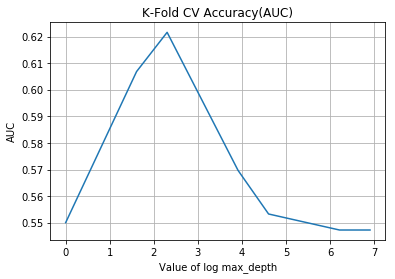

In [0]:
# Plot between different values of alpha and average score for each value of alpha 

%matplotlib inline

plt.plot(np.log(max_depth_range),K_score)
plt.xlabel("Value of log max_depth")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()

### 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

parameters = {'max_depth': max_depth_range}

In [0]:
grid_search = GridSearchCV(DT_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 21.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6208949059785528
{'max_depth': 10}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


## Representation of results

### Plotting the performance of model both on train data and cross validation data for each hyper parameter:

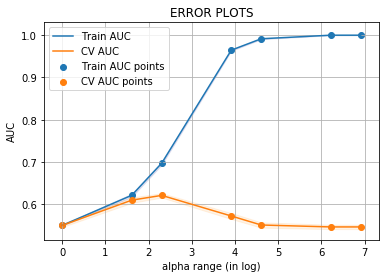

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(np.log(parameters['max_depth']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(np.log(parameters['max_depth']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(np.log(parameters['max_depth']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['max_depth']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha range (in log)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter (max_depth) 
best_max_depth= 10
best_min_samples_split=2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

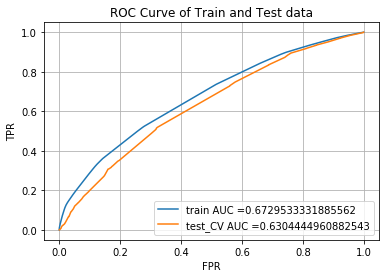

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT_clf_bow = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split,random_state=0,class_weight ='balanced')

DT_clf_bow.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =DT_clf_bow.predict_proba(X_tr)[:,1]
y_test_pred = DT_clf_bow.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

## Confusion matrix with predicted and original labels of test data points

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.37881706300382956 for threshold 0.473


Text(0.5, 24.0, 'Predicted label')

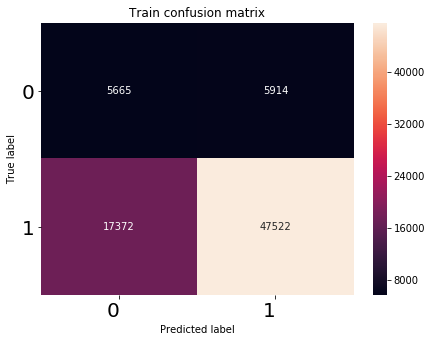

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.35172724587954024 for threshold 0.536


Text(0.5, 24.0, 'Predicted label')

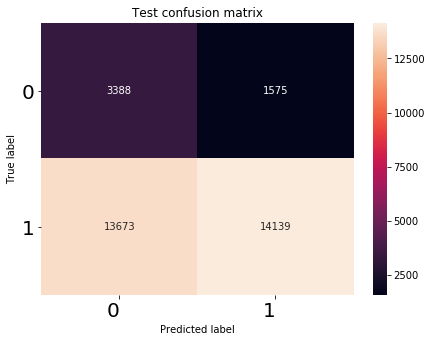

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [0]:
cm_test[0,1]

1575

In [0]:
#y_test predication
y_test_pred=DT_clf_bow.predict(X_te)

In [0]:
#y_test actual
y_test_conv=np.array(y_test)


In [0]:
#Storing index of all false positive in fp list
fp=[]
word_cloud=[]
for i in range(len(y_test_conv)):
  #print(i)
  
  if y_test_conv[i]==0 and y_test_pred[i]==1:
    fp.append(i)
  

In [0]:
#length of false positive 
len(fp)

1581

###  Once after you plot the confusion matrix with the test data, get all the `false positive data points`

 ###   Plot the WordCloud

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


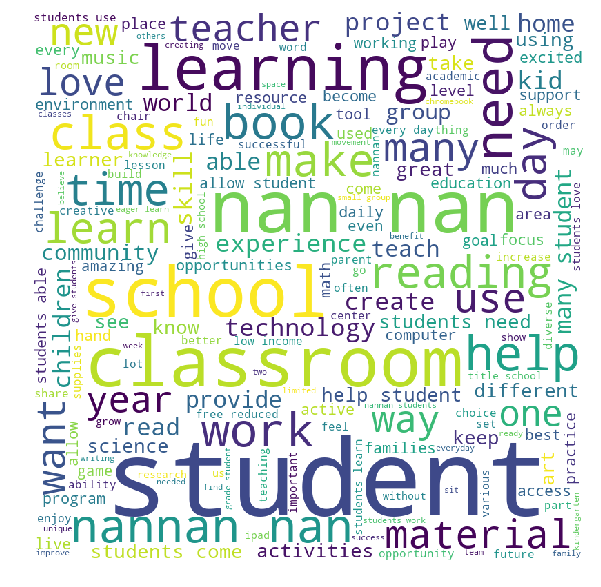

In [0]:
# Reading features of false positive   
df = x_test['preprocessed_essays'][fp]
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df:
  # typecaste each val to string 
  val = str(val) 
  
  # split the value 
  tokens = val.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower() 
          
  for words in tokens:
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Plot the box plot with the `price` of these `false positive data points`

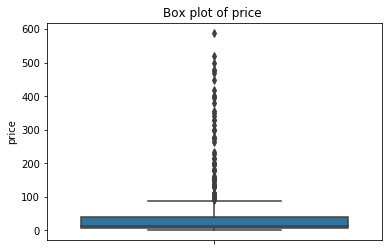

In [0]:
#x_test['price'][fp]
sns.boxplot(y=x_test['price'][fp],data=x_test)
plt.title('Box plot of price ')
plt.show()


### Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

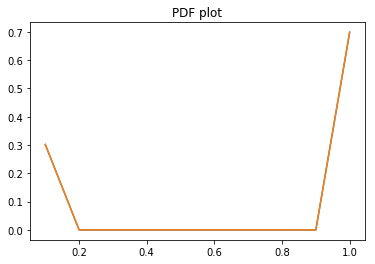

In [0]:
#Histograms and Probability Density Functions (PDF) using KDE 
counts,bin_edge=np.histogram(x_test_teacher_project_norm[fp], bins=10, density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)

counts,bin_edge=np.histogram(x_test_teacher_project_norm[fp],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.title("PDF plot")
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation

In [0]:
#https://github.com/krishnaik06/Visualizing_Tree/blob/master/01-Decision%20Trees%20and%20Random%20Forests%20in%20Python.ipynb

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(bow_feat_arr[1:])
features[:10]

['10',
 '100',
 '100 free',
 '100 percent',
 '100 students',
 '11',
 '12',
 '12th',
 '13',
 '14']

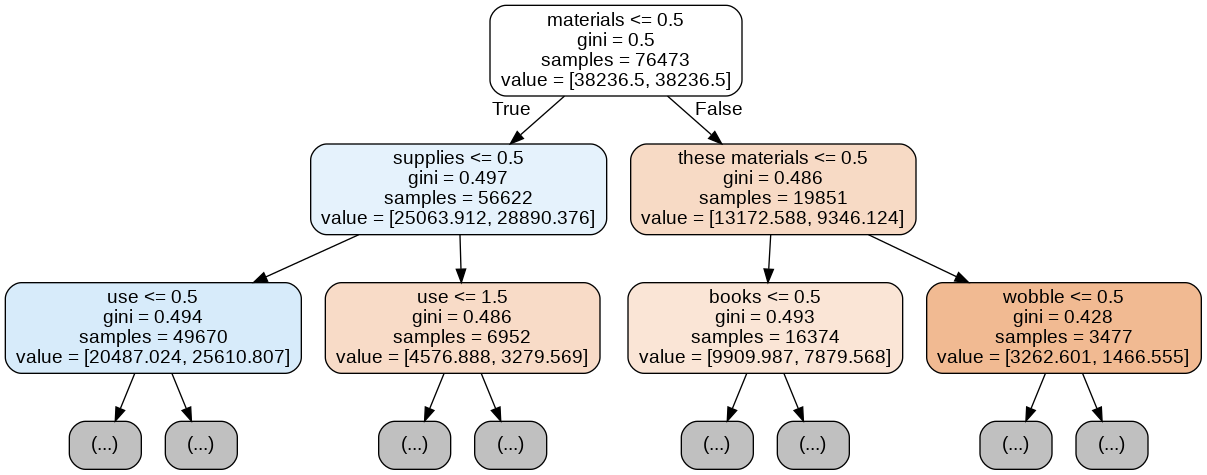

In [0]:
dot_data = StringIO()  
export_graphviz(DT_clf_bow,max_depth=2, out_file=dot_data,feature_names=bow_feat_arr,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

###Encoding Essay (TFIDF)

In [129]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
tf_idf_vect.fit(x_train['preprocessed_essays'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
x_train_tfidf_essay=tf_idf_vect.transform(x_train['preprocessed_essays'].values)
x_test_tfidf_essay=tf_idf_vect.transform(x_test['preprocessed_essays'].values)
features_essay_tfidf=tf_idf_vect.get_feature_names()

In [131]:
print(x_train_tfidf_essay.shape,y_train.shape)
print(x_test_tfidf_essay.shape,y_test.shape)

(76473, 5000) (76473,)
(32775, 5000) (32775,)


###Encoding project_title (TFIDF)

In [132]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
tf_idf_vect.fit(x_train['preprocessed_project_title'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
x_train_tfidf_project_title=tf_idf_vect.transform(x_train['preprocessed_project_title'].values)
x_test_tfidf_project_title=tf_idf_vect.transform(x_test['preprocessed_project_title'].values)
features_project_title=tf_idf_vect.get_feature_names()

In [134]:
print(x_train_tfidf_project_title.shape,y_train.shape)
print(x_test_tfidf_project_title.shape,y_test.shape)

(76473, 5000) (76473,)
(32775, 5000) (32775,)


### Concatinating all the features

In [137]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((x_train_tfidf_essay,x_train_tfidf_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te_set2 = hstack((x_test_tfidf_essay,x_test_tfidf_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set2.shape, y_train.shape)
print(X_te_set2.shape, y_test.shape)
print("="*100)

#Concatenating all the features names

#https://www.geeksforgeeks.org/python-ways-to-concatenate-two-lists/
#Converting list into array using numpy
import itertools 
tfidf_feat_arr = np.array(list(itertools.chain(features_essay_tfidf,features_project_title,features_state,features_teacher_prefix,features_project_grade_category,features_clean_categories,features_clean_subcategories,["quantity","price","teacher_project"]))) 

print("Size of features =",len(tfidf_feat_arr))


Final Data matrix
(76473, 10102) (76473,)
(32775, 10102) (32775,)
Size of features = 10102


## Applying DecisionTreeClassifier
### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation

In [138]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 

for k in max_depth_range:
    DT_clf = DecisionTreeClassifier(max_depth=k, random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(DT_clf,X_tr_set2,y_train,cv=10,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range",k)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.550782356499701 max_depth_range 1
auc score= 0.6016491895870694 max_depth_range 5
auc score= 0.6226786461616016 max_depth_range 10
auc score= 0.5645372673447799 max_depth_range 50
auc score= 0.5502799060850669 max_depth_range 100
auc score= 0.5419955039823087 max_depth_range 500
auc score= 0.5419955039823087 max_depth_range 1000


In [139]:
#Printing the average value of score for each value of alpha
print(K_score)

[0.550782356499701, 0.6016491895870694, 0.6226786461616016, 0.5645372673447799, 0.5502799060850669, 0.5419955039823087, 0.5419955039823087]


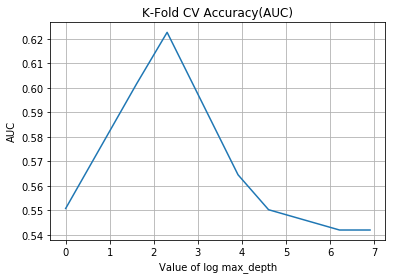

In [140]:
# Plot between different values of alpha and average score for each value of alpha 

%matplotlib inline

plt.plot(np.log(max_depth_range),K_score)
plt.xlabel("Value of log max_depth")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()

## 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

parameters = {'max_depth': max_depth_range}

In [142]:
grid_search = GridSearchCV(DT_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr_set2, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 21.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [143]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6228247889156826
{'max_depth': 10}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


### Representation of results
### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


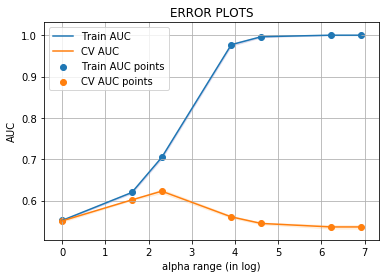

In [144]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(np.log(parameters['max_depth']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(np.log(parameters['max_depth']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(np.log(parameters['max_depth']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['max_depth']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha range (in log)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter is max_depth 
best_max_depth= 10
best_min_samples_split=2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

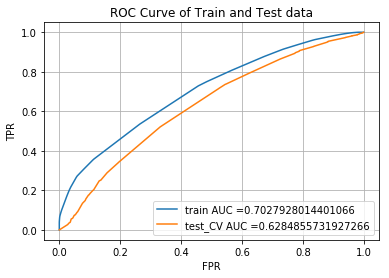

In [146]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT_clf_tfidf = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split,random_state=0,class_weight ='balanced')

DT_clf_tfidf.fit(X_tr_set2, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =DT_clf_tfidf.predict_proba(X_tr_set2)[:,1]
y_test_pred = DT_clf_tfidf.predict_proba(X_te_set2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.39596366300386737 for threshold 0.501


Text(0.5, 24.0, 'Predicted label')

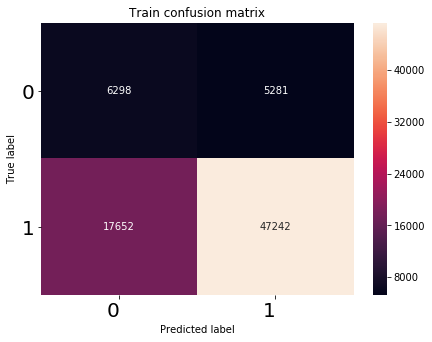

In [147]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.34842316820583347 for threshold 0.54


Text(0.5, 24.0, 'Predicted label')

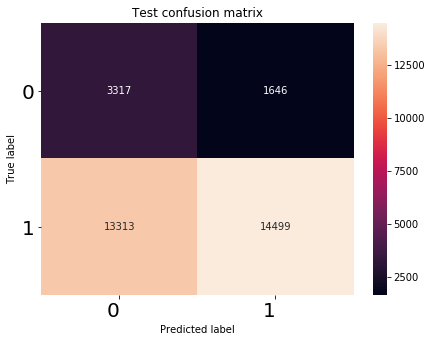

In [148]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [149]:
cm_test[0,1]

1646

In [0]:
#y_test predication
y_test_pred=DT_clf_tfidf.predict(X_te_set2)

In [0]:
#y_test actual
y_test_conv=np.array(y_test)


In [0]:
#Storing index of all false positive in fp list
fp=[]
word_cloud=[]
for i in range(len(y_test_conv)):
  #print(i)
  
  if y_test_conv[i]==0 and y_test_pred[i]==1:
    fp.append(i)
  

In [157]:
#length of false positive 
len(fp)

2597

### Once after you plot the confusion matrix with the test data, get all the false positive data points
### Plot the WordCloud


In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


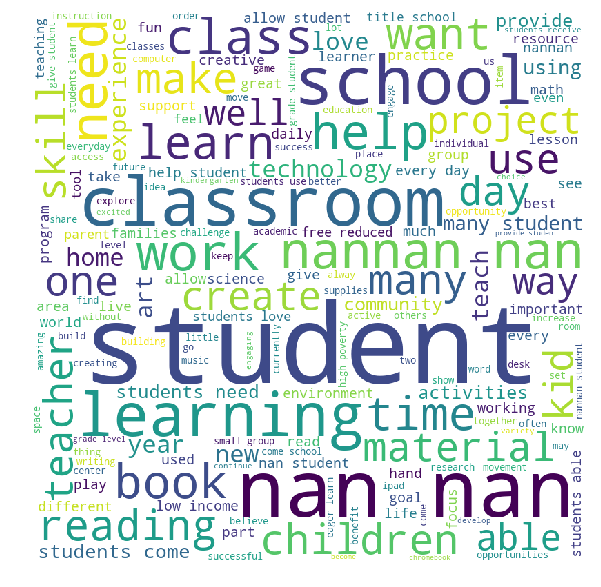

In [159]:
# Reading features of false positive   
df = x_test['preprocessed_essays'][fp]
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df:
  # typecaste each val to string 
  val = str(val) 
  
  # split the value 
  tokens = val.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower() 
          
  for words in tokens:
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Plot the box plot with the price of these false positive data points

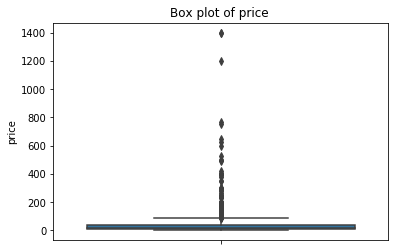

In [160]:
#x_test['price'][fp]
sns.boxplot(y=x_test['price'][fp],data=x_test)
plt.title('Box plot of price ')
plt.show()


### Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

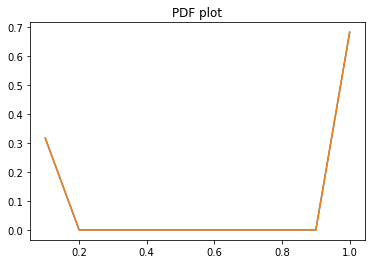

In [161]:
#Histograms and Probability Density Functions (PDF) using KDE 
counts,bin_edge=np.histogram(x_test_teacher_project_norm[fp], bins=10, density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)

counts,bin_edge=np.histogram(x_test_teacher_project_norm[fp],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.title("PDF plot")
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

In [162]:
#https://github.com/krishnaik06/Visualizing_Tree/blob/master/01-Decision%20Trees%20and%20Random%20Forests%20in%20Python.ipynb

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(tfidf_feat_arr[1:])
features[:10]

['10',
 '100',
 '100 free',
 '100 percent',
 '100 students',
 '11',
 '12',
 '12th',
 '13',
 '14']

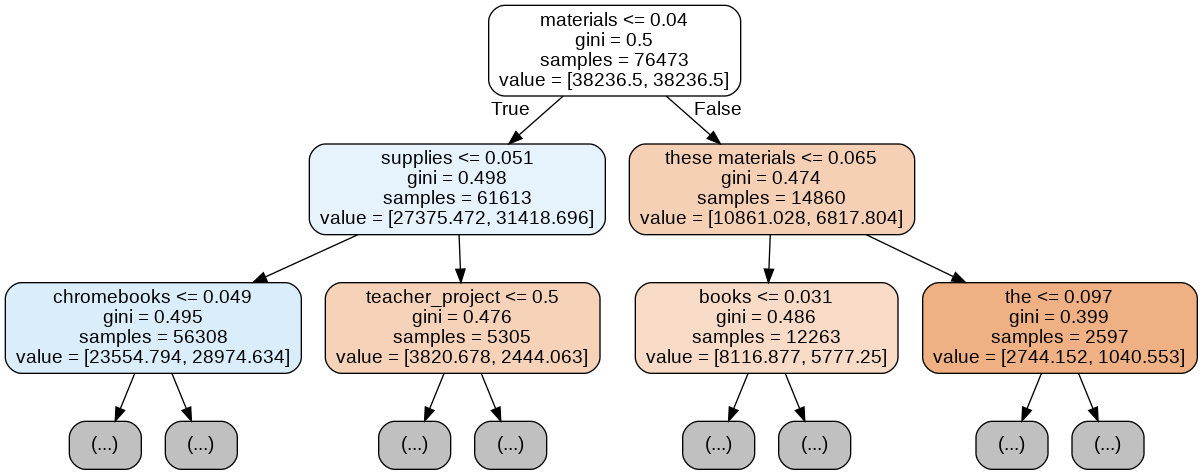

In [163]:
dot_data = StringIO()  
export_graphviz(DT_clf_tfidf,max_depth=2, out_file=dot_data,feature_names=tfidf_feat_arr,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

## Encoding project_title (AVG W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [166]:
#Building Vocab using x_train['project_title']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  4303
sample words  ['3d', 'drafting', 'everybody', 'tech', 'please', 'we', 'are', 'family', 'a', 'virtual', 'trip', 'through', 'biology', 'chromebooks', 'captivate', 'iv', 'e', 'writers', 'facilitate', 'understanding', 'learning', 'the', 'keys', 'classroom', 'necessities', 'keep', 'us', 'engaged', 'seesaw', 'projects', 'take', '2', 'reading', 'cloud', 'strike', 'band', 'it', 'time', 'heard', 'meeting', 'sensory', 'needs', 'seat', 'for', 'steaming', 'ahead', 'comprehension', 'super', 'seats', 'sounds']


In [167]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))



100%|██████████| 76473/76473 [00:06<00:00, 11011.64it/s]

76473
50


In [0]:
x_train_AVG_W2V_project_title=np.array(sent_vectors)

In [169]:
x_train_AVG_W2V_project_title.shape

(76473, 50)

In [0]:
#Avg W2V of x_test

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_test['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [171]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 32775/32775 [00:02<00:00, 11148.40it/s]

32775
50


In [172]:
x_test_AVG_W2V_project_title=np.array(sent_vectors)
x_test_AVG_W2V_project_title.shape

(32775, 50)

In [173]:
print(x_train_AVG_W2V_project_title.shape,y_train.shape)
print(x_test_AVG_W2V_project_title.shape,y_test.shape)

(76473, 50) (76473,)
(32775, 50) (32775,)


## Encoding essay (AVG W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [176]:
#Building Vocab using x_train['essay']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  20268
sample words  ['a', 'typical', 'day', 'classroom', 'busy', 'productive', 'students', 'love', 'learn', 'eager', 'hands', 'activities', 'laboratory', 'setting', 'opportunity', 'often', 'missed', 'disguised', 'hard', 'work', 'my', 'tight', 'knit', 'rural', 'community', 'show', 'school', 'spirit', 'attend', 'many', 'provided', 'they', 'small', 'classes', 'get', 'along', 'well', 'our', 'shows', 'pride', 'hallways', 'good', 'these', 'materials', 'used', 'help', 'create', 'scaled', 'accurate', '3d']


In [177]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 76473/76473 [06:52<00:00, 185.56it/s]

76473
50


In [178]:
x_train_AVG_W2V_essay=np.array(sent_vectors)
x_train_AVG_W2V_essay.shape

(76473, 50)

In [0]:
#AVG_W2V x_test
list_of_sentance=[]
for sentance in x_test['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [180]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 32775/32775 [02:59<00:00, 182.48it/s]

32775
50


In [181]:
x_test_AVG_W2V_essay=np.array(sent_vectors)
x_test_AVG_W2V_essay.shape

(32775, 50)

In [182]:
print(x_train_AVG_W2V_essay.shape,y_train.shape)
print(x_test_AVG_W2V_essay.shape,y_test.shape)

(76473, 50) (76473,)
(32775, 50) (32775,)


### Concatinating all the features

In [183]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_AVG_W2V_essay,x_train_AVG_W2V_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_AVG_W2V_essay,x_test_AVG_W2V_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()




print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(76473, 202) (76473,)
(32775, 202) (32775,)


### Applying DecisionTreeClassifier

### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


### 2. K-fold cross validation


In [184]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 

for k in max_depth_range:
    DT_clf = DecisionTreeClassifier(max_depth=k, random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(DT_clf,X_tr,y_train,cv=10,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range",k)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.5637879062224856 max_depth_range 1
auc score= 0.6249343446608531 max_depth_range 5
auc score= 0.5921863625276649 max_depth_range 10
auc score= 0.5262299527159126 max_depth_range 50
auc score= 0.5262351566208195 max_depth_range 100
auc score= 0.5262351566208195 max_depth_range 500
auc score= 0.5262351566208195 max_depth_range 1000


In [185]:
#Printing the average value of score for each value of alpha
print(K_score)

[0.5637879062224856, 0.6249343446608531, 0.5921863625276649, 0.5262299527159126, 0.5262351566208195, 0.5262351566208195, 0.5262351566208195]


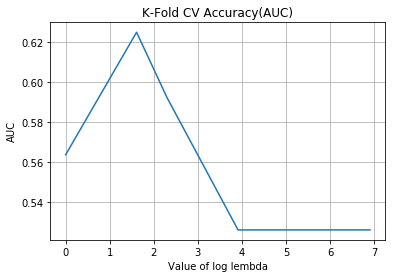

In [186]:
# Plot between different values of alpha and average score for each value of alpha 

%matplotlib inline

plt.plot(np.log(max_depth_range),K_score)
plt.xlabel("Value of log max_depth")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()

### 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

parameters = {'max_depth': max_depth_range}

In [188]:
grid_search = GridSearchCV(DT_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [189]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6217615080540765
{'max_depth': 5}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


### Representation of results
### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


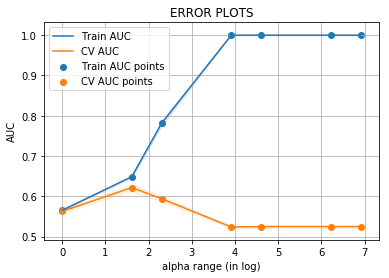

In [190]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(np.log(parameters['max_depth']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(np.log(parameters['max_depth']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(np.log(parameters['max_depth']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['max_depth']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha range (in log)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter is max_depth 
best_max_depth= 5
best_min_samples_split=2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M¶

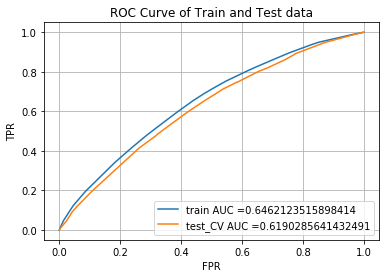

In [192]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT_clf = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split,random_state=0,class_weight ='balanced')

DT_clf.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =DT_clf.predict_proba(X_tr)[:,1]
y_test_pred = DT_clf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.3663783204670324 for threshold 0.538


Text(0.5, 24.0, 'Predicted label')

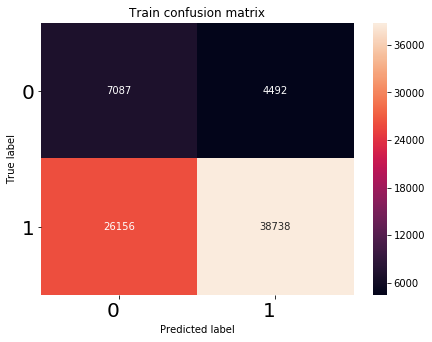

In [193]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.3449382760197647 for threshold 0.538


Text(0.5, 24.0, 'Predicted label')

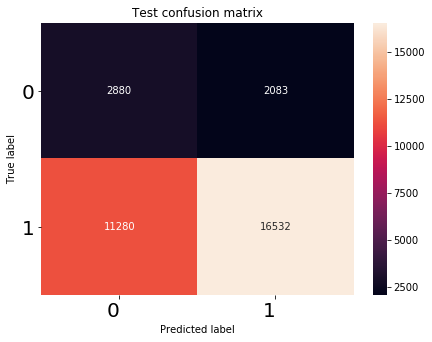

In [194]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

## Encoding project_title (TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [197]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 76473/76473 [01:33<00:00, 818.47it/s]


In [198]:
x_train_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)

(76473, 50) (76473,)


In [0]:
list_of_sentance=[]
for sentance in x_test['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())

In [200]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 32775/32775 [00:40<00:00, 813.64it/s]


In [201]:
x_test_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)

(32775, 50) (32775,)


In [202]:
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)


(76473, 50) (76473,)
(32775, 50) (32775,)


## Encoding essay(TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['preprocessed_essays']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [205]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 76473/76473 [2:28:00<00:00,  8.61it/s]


In [206]:
x_train_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)

(76473, 50) (76473,)


In [0]:
list_of_sentance=[]
for sentance in x_test['preprocessed_essays']:
    list_of_sentance.append(sentance.split())

In [208]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 32775/32775 [1:03:28<00:00,  9.22it/s]


In [209]:
x_test_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(32775, 50) (32775,)


In [210]:
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(76473, 50) (76473,)
(32775, 50) (32775,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_TFIDF_W2V_essay,x_train_TFIDF_W2V_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_TFIDF_W2V_essay,x_test_TFIDF_W2V_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()


In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(76473, 202) (76473,)
(32775, 202) (32775,)


## Applying DecisionTreeClassifier
### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation


In [212]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 

for k in max_depth_range:
    DT_clf = DecisionTreeClassifier(max_depth=k, random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(DT_clf,X_tr,y_train,cv=10,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range",k)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.5669388968076202 max_depth_range 1
auc score= 0.6349426396330848 max_depth_range 5
auc score= 0.6031209241185029 max_depth_range 10
auc score= 0.5293459540743666 max_depth_range 50
auc score= 0.5285257014680764 max_depth_range 100
auc score= 0.5285257014680764 max_depth_range 500
auc score= 0.5285257014680764 max_depth_range 1000


In [213]:
#Printing the average value of score for each value of alpha
print(K_score)

[0.5669388968076202, 0.6349426396330848, 0.6031209241185029, 0.5293459540743666, 0.5285257014680764, 0.5285257014680764, 0.5285257014680764]


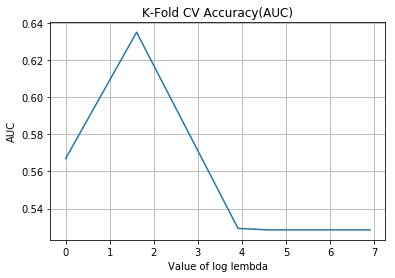

In [214]:
# Plot between different values of alpha and average score for each value of alpha 

%matplotlib inline

plt.plot(np.log(max_depth_range),K_score)
plt.xlabel("Value of log max_depth")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()

### 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

parameters = {'max_depth': max_depth_range}

In [216]:
grid_search = GridSearchCV(DT_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
grid_search.fit(X_tr, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  6.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [217]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6360160385858633
{'max_depth': 5}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


### Representation of results
### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


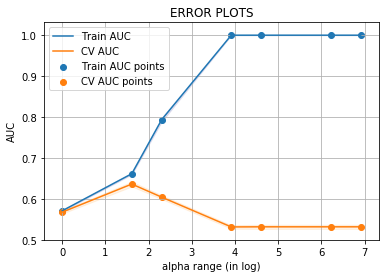

In [218]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(np.log(parameters['max_depth']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(np.log(parameters['max_depth']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(np.log(parameters['max_depth']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['max_depth']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha range (in log)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter is max_depth 
best_max_depth= 5
best_min_samples_split=2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M¶


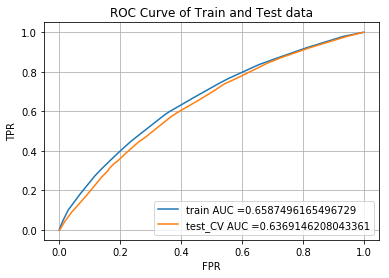

In [220]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT_clf_tfidf = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split,random_state=0,class_weight ='balanced')

DT_clf_tfidf.fit(X_tr, y_train) 
#svm_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =DT_clf_tfidf.predict_proba(X_tr)[:,1]
y_test_pred = DT_clf_tfidf.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.3818172321823095 for threshold 0.471


Text(0.5, 24.0, 'Predicted label')

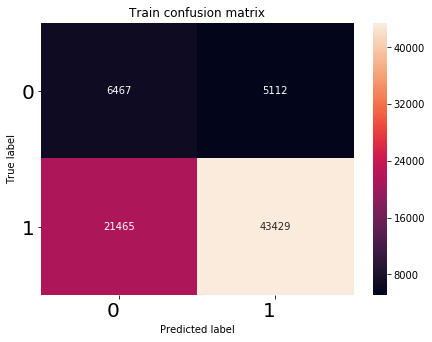

In [221]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data


the maximum value of tpr*(1-fpr) 0.3635873535498805 for threshold 0.509


Text(0.5, 24.0, 'Predicted label')

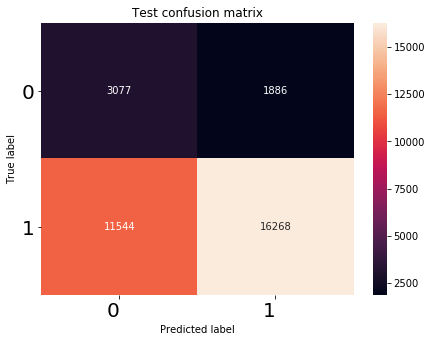

In [222]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
 DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

In [0]:
DT_clf=DT_clf.fit(X_tr_set2, y_train)

In [0]:
# Calculate feature importances
importances = DT_clf.feature_importances_


### Select 5k best features from features of Set 2 using`feature_importances_ for Train data 

In [0]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# Sort feature importances in descending order
k = 5000
indices = np.argsort(importances)[-k:][::-1]


In [227]:
x_tr_edited=X_tr_set2[:,indices]
x_tr_edited.shape

(76473, 5000)

In [228]:
x_tr_edited

<76473x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 10139587 stored elements in Compressed Sparse Row format>

 ### Select 5k best features from features of Set 2 using`feature_importances_ for Test data 

In [0]:
DT_clf=DT_clf.fit(X_te_set2, y_test)

In [0]:
# Calculate feature importances
importances = DT_clf.feature_importances_

In [0]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# Sort feature importances in descending order
k = 5000
indices = np.argsort(importances)[-k:][::-1]


In [232]:
x_te_edited=X_te_set2[:,indices]
x_te_edited.shape

(32775, 5000)

#### Applying DecisionTreeClassifier
### 1. Find the best hyper parameter which results in the maximum AUC value
### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation


In [233]:
#Searching optimal value of max_depth in Decision Tree

K_score=[] # creating list that stores average scores for each max_depth_range 

for k in max_depth_range:
    DT_clf = DecisionTreeClassifier(max_depth=k, random_state=0,class_weight ='balanced')# passing values of k in this classifier
    scores=cross_val_score(DT_clf,x_tr_edited,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print("auc score=",scores.mean(),"max_depth_range",k)
    K_score.append(scores.mean()) # appending the mean score of each value of max_depth_range


auc score= 0.5510843392532554 max_depth_range 1
auc score= 0.6019357425316955 max_depth_range 5
auc score= 0.6229946874159527 max_depth_range 10
auc score= 0.5609711151462291 max_depth_range 50
auc score= 0.5444680652644284 max_depth_range 100
auc score= 0.5385886595267342 max_depth_range 500
auc score= 0.5385886595267342 max_depth_range 1000


In [234]:
#Printing the average value of score for each value of alpha
print(K_score)

[0.5510843392532554, 0.6019357425316955, 0.6229946874159527, 0.5609711151462291, 0.5444680652644284, 0.5385886595267342, 0.5385886595267342]


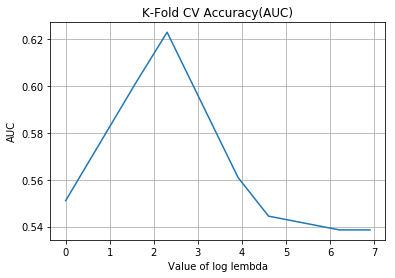

In [235]:
# Plot between different values of alpha and average score for each value of alpha 

%matplotlib inline

plt.plot(np.log(max_depth_range),K_score)
plt.xlabel("Value of log lembda")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()

### 3. GridSearchCV 

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
DT_clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

parameters = {'max_depth': max_depth_range}

In [237]:
grid_search = GridSearchCV(DT_clf, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2,return_train_score=True)
#grid_search.fit(X_tr_set2,y_train)
grid_search.fit(x_tr_edited,y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 20.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [238]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)



Best Score= 0.6229948296642391
{'max_depth': 10}
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


### Representation of results

### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


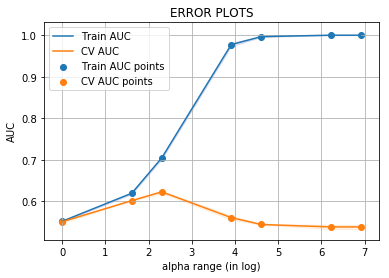

In [239]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(np.log(parameters['max_depth']), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(np.log(parameters['max_depth']), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['max_depth']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(np.log(parameters['max_depth']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['max_depth']), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha range (in log)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter is max_depth 
best_max_depth= 10
best_min_samples_split=2


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

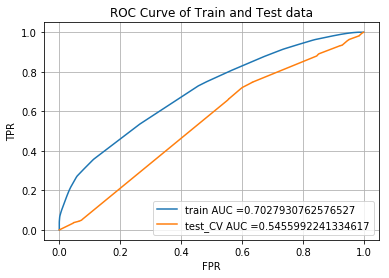

In [241]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

DT_clf_tfidf = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split,random_state=0,class_weight ='balanced')

DT_clf_tfidf.fit(x_tr_edited, y_train) 

y_train_pred =DT_clf_tfidf.predict_proba(x_tr_edited)[:,1]
y_test_pred = DT_clf_tfidf.predict_proba(x_te_edited)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()

### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.39596366300386737 for threshold 0.501


Text(0.5, 24.0, 'Predicted label')

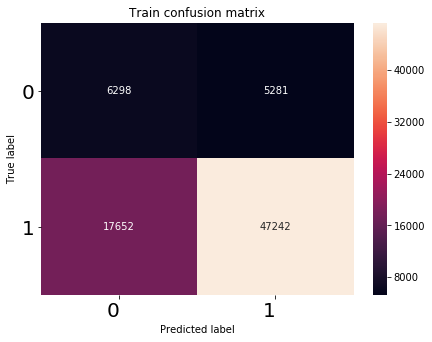

In [242]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Confusion matrix of Test data 

the maximum value of tpr*(1-fpr) 0.2936729931798777 for threshold 0.806


Text(0.5, 24.0, 'Predicted label')

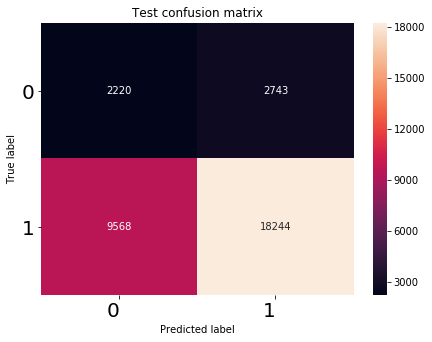

In [243]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [244]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("Decision Tre Algorithm")
x.field_names = ["Vectorizer", "Model", "Hyper parameter(max_depth) (Grid Search)","AUC(TEST AUC)"]
x.add_row([("BOW"),("Decision Tree"),(10),(0.6304)])
x.add_row([('TFIDF'),("Decision Tree"),(10),(0.6284)])
x.add_row([('AVG W2V'),("Decision Tree"),(5),(0.6190)])
x.add_row([('TFIDF W2V'),("Decision Tree"),(5),(0.6369)])


print(x)

Decision Tre Algorithm
+------------+---------------+------------------------------------------+---------------+
| Vectorizer |     Model     | Hyper parameter(max_depth) (Grid Search) | AUC(TEST AUC) |
+------------+---------------+------------------------------------------+---------------+
|    BOW     | Decision Tree |                    10                    |     0.6304    |
|   TFIDF    | Decision Tree |                    10                    |     0.6284    |
|  AVG W2V   | Decision Tree |                    5                     |     0.619     |
| TFIDF W2V  | Decision Tree |                    5                     |     0.6369    |
+------------+---------------+------------------------------------------+---------------+


In [245]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("\n After Selecting 5k best features from features of Set 2 using`feature_importances_  \n")
x.field_names = ["Vectorizer", "Model", "Hyper parameter(max_depth) (Grid Search)","AUC(TEST AUC)"]

x.add_row([('SET 5'),("Decision Tree"),(10),(0.54)])

print(x)


 After Selecting 5k best features from features of Set 2 using`feature_importances_  

+------------+---------------+------------------------------------------+---------------+
| Vectorizer |     Model     | Hyper parameter(max_depth) (Grid Search) | AUC(TEST AUC) |
+------------+---------------+------------------------------------------+---------------+
|   SET 5    | Decision Tree |                    10                    |      0.54     |
+------------+---------------+------------------------------------------+---------------+


##  Elaborating each steps:

1) For this Assignment I'm using only 1,09,248 data points.

2) There are two dataframes such as project_data and resources_data.

3) Merging all the features of resource_data into project_data by creating new columns. ex- data_quantity=resource_data['quantity'], project_data['quantity']=data_quantity, in this way.

4) Splitting the data into two parts such as train,test.

5) Encording all the categorical,numerical features by take caring of data leakage.

6) Encording Essay and project_title using (BOW,TFIDF,W2V,TFIDF W2V)

7) Concatenating all the categorical,numerical,(BOW,TFIDF,W2V,TFIDF W2V) features. Also Concatenating all the features names in different list.

8)Applying Decision Tree Classifier:-

(i) Finding best hyperparameter(max_depth) which results in the maximun AUC.

(ii) Here I'm using K-fold cross validation for finding optimal value of max_depth in DT.

-Here also I'm using Sklearn library to do so.
-Taking  max_depth value range which is max_depth(1 to 10^3).
-I'm doing 5-fold cv=5 for better accuracy.
-Passing only training data.
-Scoring=roc_auc for calculating scoring. we can do other scoring matrix too but here I'm taking auc under consideration.
-Taking mean of all the score and plotting a plot b/w hyperparameter and average score.

(iii)Here I'm using GridSearchCV for finding optimal value of max_depth in DT.

-Here I'm passing on X_tr(train) data.
- CV value is 5 that I'm passing.
- Accuracy matrix is roc_auc
- It gives best parameters and best scoring.

9) Representation of result:

-Plotting a plot using gridsearchcv between train and cv then finding optimal value of max_depth by the help of plot.

10) After finding the optimal hyperparameter(max_depth):

-Trained the model using best hyperparameter. -Plotting roc_curve for both train and test data.

11) Making confusion matrix for train and test data.

12)At last we make prettytable to summarized the results.

13)Here in SET 5 I used  feature importance attribute  for Decsion Tree.Where I'm selection top 5K features and did hyperparameter tunning using DT. The results in accuracy is decreases  as we previously calculated in SET 2.

    In this for hyperparamter I'm considering GridSearchCV (grid_search.best_params_) this function value.
    For AUC I'm taking Test AUC for each SET such as (BOW,TFIDF).

